# Titanic data set Preprocessing and Model Selection
Do the following on titanic dataset
1. Load the dataset into python environment
2. Do all the necessary pre-processing steps
3. Create kNN and SVM models
4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Reading dataset and set 'PassengerId' as index

data = pd.read_csv('titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory data analysis

In [4]:
data.shape

(891, 12)

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.shape

(891, 12)

In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#Survived is the target column

In [10]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
#As we know, majority of passengers couldn't survive.

In [12]:
# Checking for duplicate rows

data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
#no duplicates

In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data.isna().sum() / data.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# Insights
 1. 'Survived' is the target column/variable.
 2. 'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.
 3. 'Age' and 'Embarked' has less number of missing value. We have to fill them.
 4.  As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.
 5. 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare' doesn't have any missing values.
 6.  We can also create new variable like 'total size of the family' from the columns 'SibSp' and 'Parch'.

In [16]:
data = data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [17]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Handling missing values

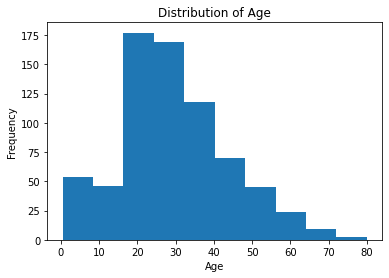

In [18]:
## Visualization of Age column

plt.hist(data['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()

In [19]:
#Since Age is normally distributed we can fill the missing values of Age with mean, median or mode

In [20]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [21]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [22]:
# We have filled the missing values of Age with median

In [23]:
data['Embarked'].mode()[0]

'S'

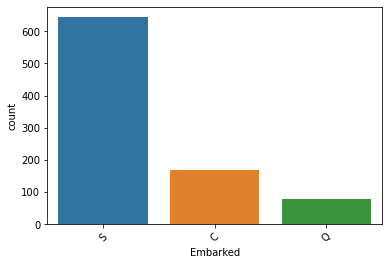

In [24]:
# Visualization of Embarked column
sns.countplot(x='Embarked', data = data)
plt.xticks(rotation=45)
plt.show()

In [25]:
Embarked_mode = data['Embarked'].mode()[0]

In [26]:
### filling column 'Embarked' with mode value

data['Embarked'] = data['Embarked'].fillna(Embarked_mode)

In [27]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [28]:
#Filled all the Missing values

# Feature Engineering

In [29]:
#Create a new feature 'Family size' from the features 'SibSp' and 'Parch

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1


In [30]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


# Minmax Scaling

In [31]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,1.904602
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [32]:
X1 = data[['Pclass','Age','SibSp','Parch','Fare','FamilySize']]

In [33]:
X1.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize
0,3,22.0,1,0,7.2500,2
1,1,38.0,1,0,71.2833,2
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,2
4,3,35.0,0,0,8.0500,1


In [34]:
from sklearn import preprocessing

In [35]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X1 = min_max_scaler.fit_transform(X1)

In [36]:
type(X1)

numpy.ndarray

In [37]:
### After using Min max scaler our data frame is changed to an array
#we have to convert it back to data frame.Also it has no column names.
#So we need to convert it back to a data frame and give column names

In [38]:
X1 = pd.DataFrame(X1, columns=['Pclass','Age','SibSp','Parch','Fare','FamilySize'])

In [39]:
X1.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize
0,1.0,0.271174,0.125,0.0,0.014151,0.1
1,0.0,0.472229,0.125,0.0,0.139136,0.1
2,1.0,0.321438,0.000,0.0,0.015469,0.0
3,0.0,0.434531,0.125,0.0,0.103644,0.1
4,1.0,0.434531,0.000,0.0,0.015713,0.0


In [40]:
X1.describe()

,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.363679,0.065376,0.063599,0.062858,0.090460
std,0.418036,0.163605,0.137843,0.134343,0.096995,0.161346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.015440,0.000000
50%,1.000000,0.346569,0.000000,0.000000,0.028213,0.000000
75%,1.000000,0.434531,0.125000,0.000000,0.060508,0.100000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
#We did Minmax Scaling

In [42]:
data1 = data.drop(['Pclass','Age','SibSp','Parch','Fare','FamilySize'], axis=1)

In [43]:
data1 = pd.concat([data1,X1], axis=1)

In [44]:
data1.head()

,Survived,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare,FamilySize
0,0,male,S,1.0,0.271174,0.125,0.0,0.014151,0.1
1,1,female,C,0.0,0.472229,0.125,0.0,0.139136,0.1
2,1,female,S,1.0,0.321438,0.000,0.0,0.015469,0.0
3,1,female,S,0.0,0.434531,0.125,0.0,0.103644,0.1
4,0,male,S,1.0,0.434531,0.000,0.0,0.015713,0.0


In [45]:
data1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.363679,0.065376,0.063599,0.062858,0.090460
std,0.486592,0.418036,0.163605,0.137843,0.134343,0.096995,0.161346
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.271174,0.000000,0.000000,0.015440,0.000000
50%,0.000000,1.000000,0.346569,0.000000,0.000000,0.028213,0.000000
75%,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508,0.100000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
#We have scaled data

# One Hot Encoding

In [47]:
data1 = pd.get_dummies(data1)

In [48]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1.0,0.271174,0.125,0.0,0.014151,0.1,0,1,0,0,1
1,1,0.0,0.472229,0.125,0.0,0.139136,0.1,1,0,1,0,0
2,1,1.0,0.321438,0.000,0.0,0.015469,0.0,1,0,0,0,1
3,1,0.0,0.434531,0.125,0.0,0.103644,0.1,1,0,0,0,1
4,0,1.0,0.434531,0.000,0.0,0.015713,0.0,0,1,0,0,1


In [49]:
# now all our columns are numerical.so we can create model

# Splitting data

In [50]:
X = data1.drop('Survived', axis=1)
y = data1['Survived']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                    random_state=42)  

# K Nearest Neighbour (KNN)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [53]:
#steps to find optimum value for k 
metric_k = []
neighbors = range(3, 18)  
# it will take the values from 3 to 17

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train, y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kNN)
    metric_k.append(acc)
    

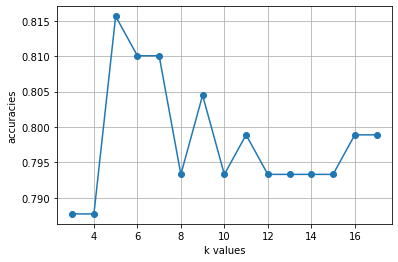

In [54]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid()

In [55]:
# From this graph we can identify which k value is giving highest accuracy
# Here 5 is givig highest accuracy

#So we can create a model with k=5

In [56]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(X_train, y_train)
y_pred_kNN = classifier.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_kNN)

array([[91, 14],
       [19, 55]], dtype=int64)

In [58]:
accuracy_score(y_test, y_pred_kNN)

0.8156424581005587

# K-Fold Cross Validation 
The training data used in the model is split, into k number of smaller sets, to be used to validate the model. The model is then trained on k-1 folds of training set. The remaining fold is then used as a validation set to evaluate the model.

# Stratified K-Fold cross validation
In cases where classes are imbalanced we need a way to account for the imbalance in both the train and validation sets. To do so we can stratify the target classes, meaning that both sets will have an equal proportion of all classes.


# K-Fold Cross Validation of KNN

In [59]:
from sklearn.model_selection import KFold, cross_val_score

In [60]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(classifier, X, y, cv = k_folds)

In [61]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.75977654 0.78651685 0.82022472 0.78089888 0.83146067]
Average CV Score:  0.7957755319816708
Number of CV Scores used in Average:  5


# Stratified K-Fold cross validation of KNN 

In [62]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [63]:
sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(classifier, X, y, cv = sk_folds)

In [64]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.76536313 0.7752809  0.8258427  0.79775281 0.81460674]
Average CV Score:  0.7957692549118072
Number of CV Scores used in Average:  5


# Support Vector Machines (SVM)

In [65]:
from sklearn.svm import SVC

In [66]:
### Linear Kernal or Linear SVM

clf_svm = SVC(kernel='linear')
clf_svm = clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

In [67]:
confusion_matrix(y_test, y_pred_svm)

array([[88, 17],
       [22, 52]], dtype=int64)

In [68]:
accuracy_score(y_test, y_pred_svm)

0.7821229050279329

In [69]:
# 78% accuracy

In [70]:
### rbf Kernal

clf_svm2 = SVC(kernel='rbf')
clf_svm2 = clf_svm2.fit(X_train, y_train)
y_pred_svm2 = clf_svm2.predict(X_test)

In [71]:
confusion_matrix(y_test, y_pred_svm2)

array([[95, 10],
       [27, 47]], dtype=int64)

In [72]:
accuracy_score(y_test, y_pred_svm2)

0.7932960893854749


# K-Fold Cross Validation of SVM


In [74]:
#### K-Fold cross validation for Linear Kernal or Linear SVM

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf_svm, X, y, cv = k_folds)

In [75]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.81564246 0.79775281 0.78089888 0.73595506 0.80337079]
Average CV Score:  0.7867239972380893
Number of CV Scores used in Average:  5


In [76]:
#### K-Fold cross validation for rbf Kernal

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf_svm2, X, y, cv = k_folds)


In [77]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.82681564 0.80337079 0.80898876 0.76966292 0.83146067]
Average CV Score:  0.8080597577051032
Number of CV Scores used in Average:  5


# Stratified K-Fold cross validation of SVM

In [78]:
#### Stratified K-Fold cross validation for Linear Kernal or Linear SVM

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf_svm, X, y, cv = sk_folds)

In [79]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.80446927 0.80337079 0.78651685 0.75280899 0.78651685]
Average CV Score:  0.7867365513778168
Number of CV Scores used in Average:  5


In [80]:
#### Stratified K-Fold cross validation for rbf Kernal


sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf_svm2, X, y, cv = sk_folds)

In [81]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.80446927 0.82022472 0.80898876 0.78651685 0.81460674]
Average CV Score:  0.8069612704789405
Number of CV Scores used in Average:  5


# <font color='green'> Found better accuracy when doing K-Fold cross validation for RBF Kernal. That is 80%. </font>

# <font color='green'> Found better accuracy for KNN model with out cross validation. That is 81%. </font>